# Autism Diagnosis EDA and Prediction Model

Link to Data: https://www.kaggle.com/datasets/andrewmvd/autism-screening-on-adults

Link to More Information on Data: https://docs.autismresearchcentre.com/tests/AQ10.pdf

### AQ-10 Questionaire used in Dataset

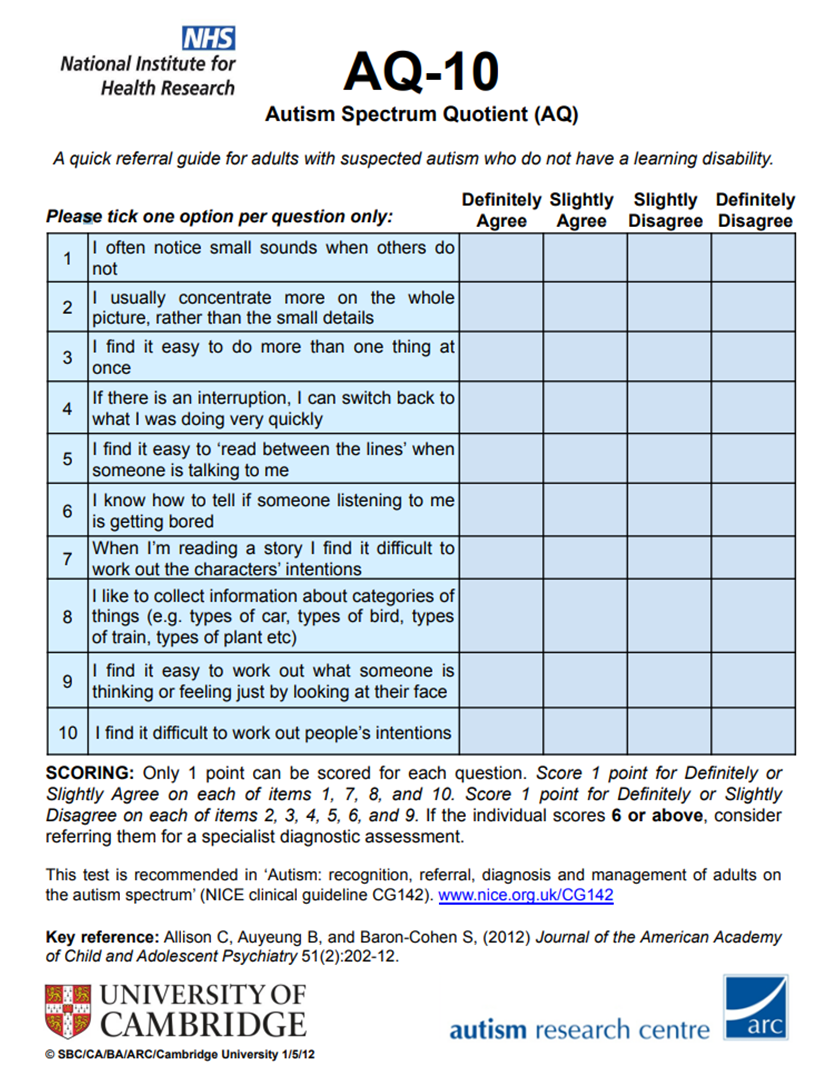

### Necessary Imports

In [368]:
import pandas as pd
pd.set_option('display.max_columns', 500)
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import plot_model

# Read, Prepare and Clean Data

### Read In and Glimpse Data

In [369]:
df = pd.read_csv('autism_screening.csv')
df = df.rename(columns={'austim':'autism'})
df = df.reset_index()
df.head()

,index,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jundice,autism,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,0,1,1,1,1,0,0,1,1,0,0,26.0,f,White-European,no,no,United States,no,6.0,18 and more,Self,NO
1,1,1,1,0,1,0,0,0,1,0,1,24.0,m,Latino,no,yes,Brazil,no,5.0,18 and more,Self,NO
2,2,1,1,0,1,1,0,1,1,1,1,27.0,m,Latino,yes,yes,Spain,no,8.0,18 and more,Parent,YES
3,3,1,1,0,1,0,0,1,1,0,1,35.0,f,White-European,no,yes,United States,no,6.0,18 and more,Self,NO
4,4,1,0,0,0,0,0,0,1,0,0,40.0,f,?,no,no,Egypt,no,2.0,18 and more,?,NO


### Describe Data

In [370]:
df.shape

(704, 22)

In [371]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 704 entries, 0 to 703
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   index            704 non-null    int64  
 1   A1_Score         704 non-null    int64  
 2   A2_Score         704 non-null    int64  
 3   A3_Score         704 non-null    int64  
 4   A4_Score         704 non-null    int64  
 5   A5_Score         704 non-null    int64  
 6   A6_Score         704 non-null    int64  
 7   A7_Score         704 non-null    int64  
 8   A8_Score         704 non-null    int64  
 9   A9_Score         704 non-null    int64  
 10  A10_Score        704 non-null    int64  
 11  age              702 non-null    float64
 12  gender           704 non-null    object 
 13  ethnicity        704 non-null    object 
 14  jundice          704 non-null    object 
 15  autism           704 non-null    object 
 16  contry_of_res    704 non-null    object 
 17  used_app_before 

In [372]:
df.describe()

,index,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,result
count,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,702.000000,704.000000
mean,351.500000,0.721591,0.453125,0.457386,0.495739,0.498580,0.284091,0.417614,0.649148,0.323864,0.573864,29.698006,4.875000
std,203.371581,0.448535,0.498152,0.498535,0.500337,0.500353,0.451301,0.493516,0.477576,0.468281,0.494866,16.507465,2.501493
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.000000,0.000000
25%,175.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,21.000000,3.000000
50%,351.500000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,27.000000,4.000000
75%,527.250000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,35.000000,7.000000
max,703.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,383.000000,10.000000


### Missing Values

In [373]:
pd.DataFrame(df.isnull().sum(), columns=["Missing Values"]).style.bar(color = "orange")

,Missing Values
index,0
A1_Score,0
A2_Score,0
A3_Score,0
A4_Score,0
A5_Score,0
A6_Score,0
A7_Score,0
A8_Score,0
A9_Score,0


### Fill Missing Age Values

In [374]:
df['age'] = df['age'].fillna(np.round(df['age'].mean(), 0))

In [375]:
pd.DataFrame(df.isnull().sum(), columns=["Missing Values"])

,Missing Values
index,0
A1_Score,0
A2_Score,0
A3_Score,0
A4_Score,0
A5_Score,0
A6_Score,0
A7_Score,0
A8_Score,0
A9_Score,0


### Remove Age Outliers

In [376]:
print(f"Maximum age is data: {df['age'].max()}\n")
print(f"Minimum age is data: {df['age'].min()}")

Maximum age is data: 383.0

Minimum age is data: 17.0


In [377]:
df = df[df.age != 383.0]

In [378]:
print(f"Maximum age is data: {df['age'].max()}\n")
print(f"Minimum age is data: {df['age'].min()}")

Maximum age is data: 64.0

Minimum age is data: 17.0


### Fix '?' and 'other' data in df['ethnicity']

In [379]:
df['ethnicity'] = df['ethnicity'].replace('?', 'Others')
df['ethnicity'] = df['ethnicity'].replace('others', 'Others')

### Fix Relation Data

In [380]:
df['relation'] = df['relation'].replace('?', df['relation'].mode()[0])

### Unique Values

In [381]:
for col in df.select_dtypes('O').columns:
    print("-------------------------------")
    print(f'\nColumn name: {col}\n')
    print(f'Unique values:\n{df[col].unique()}\n')

-------------------------------

Column name: gender

Unique values:
['f' 'm']

-------------------------------

Column name: ethnicity

Unique values:
['White-European' 'Latino' 'Others' 'Black' 'Asian' 'Middle Eastern '
 'Pasifika' 'South Asian' 'Hispanic' 'Turkish']

-------------------------------

Column name: jundice

Unique values:
['no' 'yes']

-------------------------------

Column name: autism

Unique values:
['no' 'yes']

-------------------------------

Column name: contry_of_res

Unique values:
['United States' 'Brazil' 'Spain' 'Egypt' 'New Zealand' 'Bahamas'
 'Burundi' 'Austria' 'Argentina' 'Jordan' 'Ireland' 'United Arab Emirates'
 'Afghanistan' 'Lebanon' 'United Kingdom' 'South Africa' 'Italy'
 'Pakistan' 'Bangladesh' 'Chile' 'France' 'China' 'Australia' 'Canada'
 'Saudi Arabia' 'Netherlands' 'Romania' 'Sweden' 'Tonga' 'Oman' 'India'
 'Philippines' 'Sri Lanka' 'Sierra Leone' 'Ethiopia' 'Viet Nam' 'Iran'
 'Costa Rica' 'Germany' 'Mexico' 'Russia' 'Armenia' 'Iceland' 'Nic

# Data Visualization

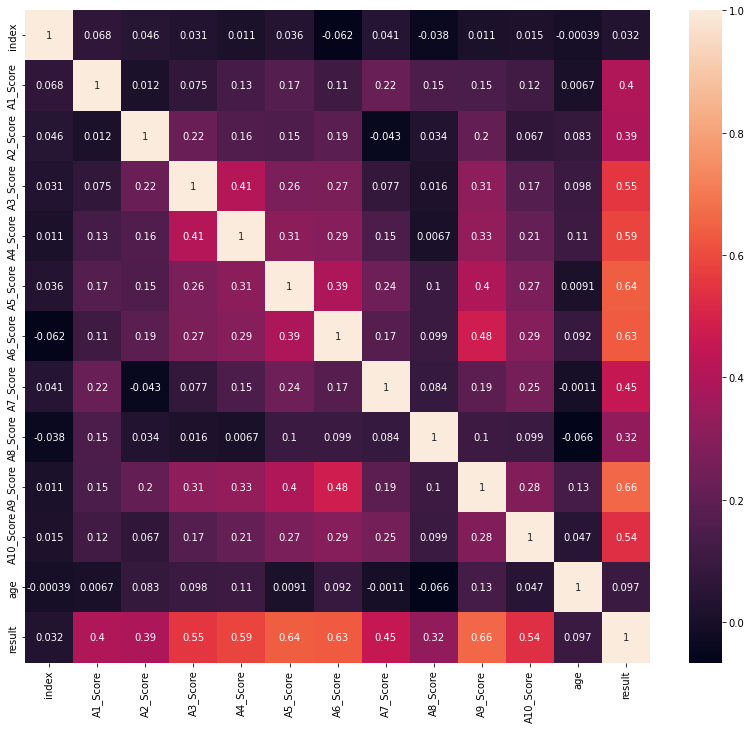

In [386]:
plt.figure(figsize=(14,12))
corrMatrix = df.corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()

### Mean Values For Autism vs Non-Autism

In [387]:
grouped_mean = df.groupby(['autism']).mean().drop(columns=['index'])

styled_df = grouped_mean.style.background_gradient(
    cmap='Reds', 
    subset=['result'], 
    vmin=3, 
    vmax=7
).background_gradient(
    cmap='Blues', 
    subset=['age'], 
    vmin=16, 
    vmax=65
).background_gradient(
    cmap='Greens',
    subset=[i for i  in grouped_mean.drop(columns=['age','result']).columns],
    vmin=.2,
    vmax=.8)

display(styled_df)

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,result
autism,,,,,,,,,,,,
no,0.704248,0.439542,0.436275,0.459150,0.482026,0.264706,0.419935,0.643791,0.294118,0.552288,28.517974,4.696078
yes,0.835165,0.549451,0.604396,0.747253,0.615385,0.417582,0.406593,0.692308,0.527473,0.725275,33.758242,6.120879


### Mean Values For Autism vs Non-Autism (Male vs Female)

In [388]:
grouped_mean = df.groupby(['autism','gender']).mean().drop(columns=['index'])

styled_df = grouped_mean.style.background_gradient(
    cmap='Reds', 
    subset=['result'], 
    vmin=3, 
    vmax=7
).background_gradient(
    cmap='Blues', 
    subset=['age'], 
    vmin=16, 
    vmax=65
).background_gradient(
    cmap='Greens',
    subset=[i for i  in grouped_mean.drop(columns=['age','result']).columns],
    vmin=.2,
    vmax=.8)

display(styled_df)

### ASD Countrywise

In [389]:
asd_patients_country_wise = pd.DataFrame(df[df['Class/ASD'] == "YES"]['contry_of_res'].value_counts()).rename({"contry_of_res":"ASD_Patient_Counts"}, axis = 1)
asd_patients_country_wise.style.bar(color="dodgerblue") 

,ASD_Patient_Counts
United States,53
United Kingdom,29
New Zealand,15
Australia,12
Canada,10
India,6
France,5
Brazil,5
Malaysia,4
Mexico,4


### ASD by Gender

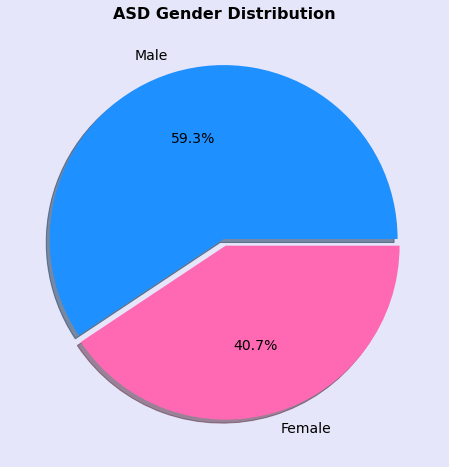

In [390]:
colors = {'Male': 'dodgerblue', 'Female': 'hotpink'}

gender_counts = df[df.autism=='yes']['gender'].value_counts()
labels = df['gender'].value_counts().index.map({'m': 'Male', 'f': 'Female'})

fig, ax = plt.subplots(figsize=(8,8))
fig.set_facecolor('lavender')
ax.set_title('ASD Gender Distribution', fontsize=16, fontweight='bold')
ax.pie(gender_counts,
        labels=labels,
        colors=[colors[g] for g in labels],
        autopct='%1.1f%%',
        explode=[0.02,0.02],
        shadow=True,
        textprops={'fontsize': 14})

plt.show()

### DataFrame grouped by Autism Index

In [391]:
# avn ~ autism vs neurotypical
df_avn = df.groupby(['autism', 'A1_Score']).size()

### AQ-10 Responses for All Respondents

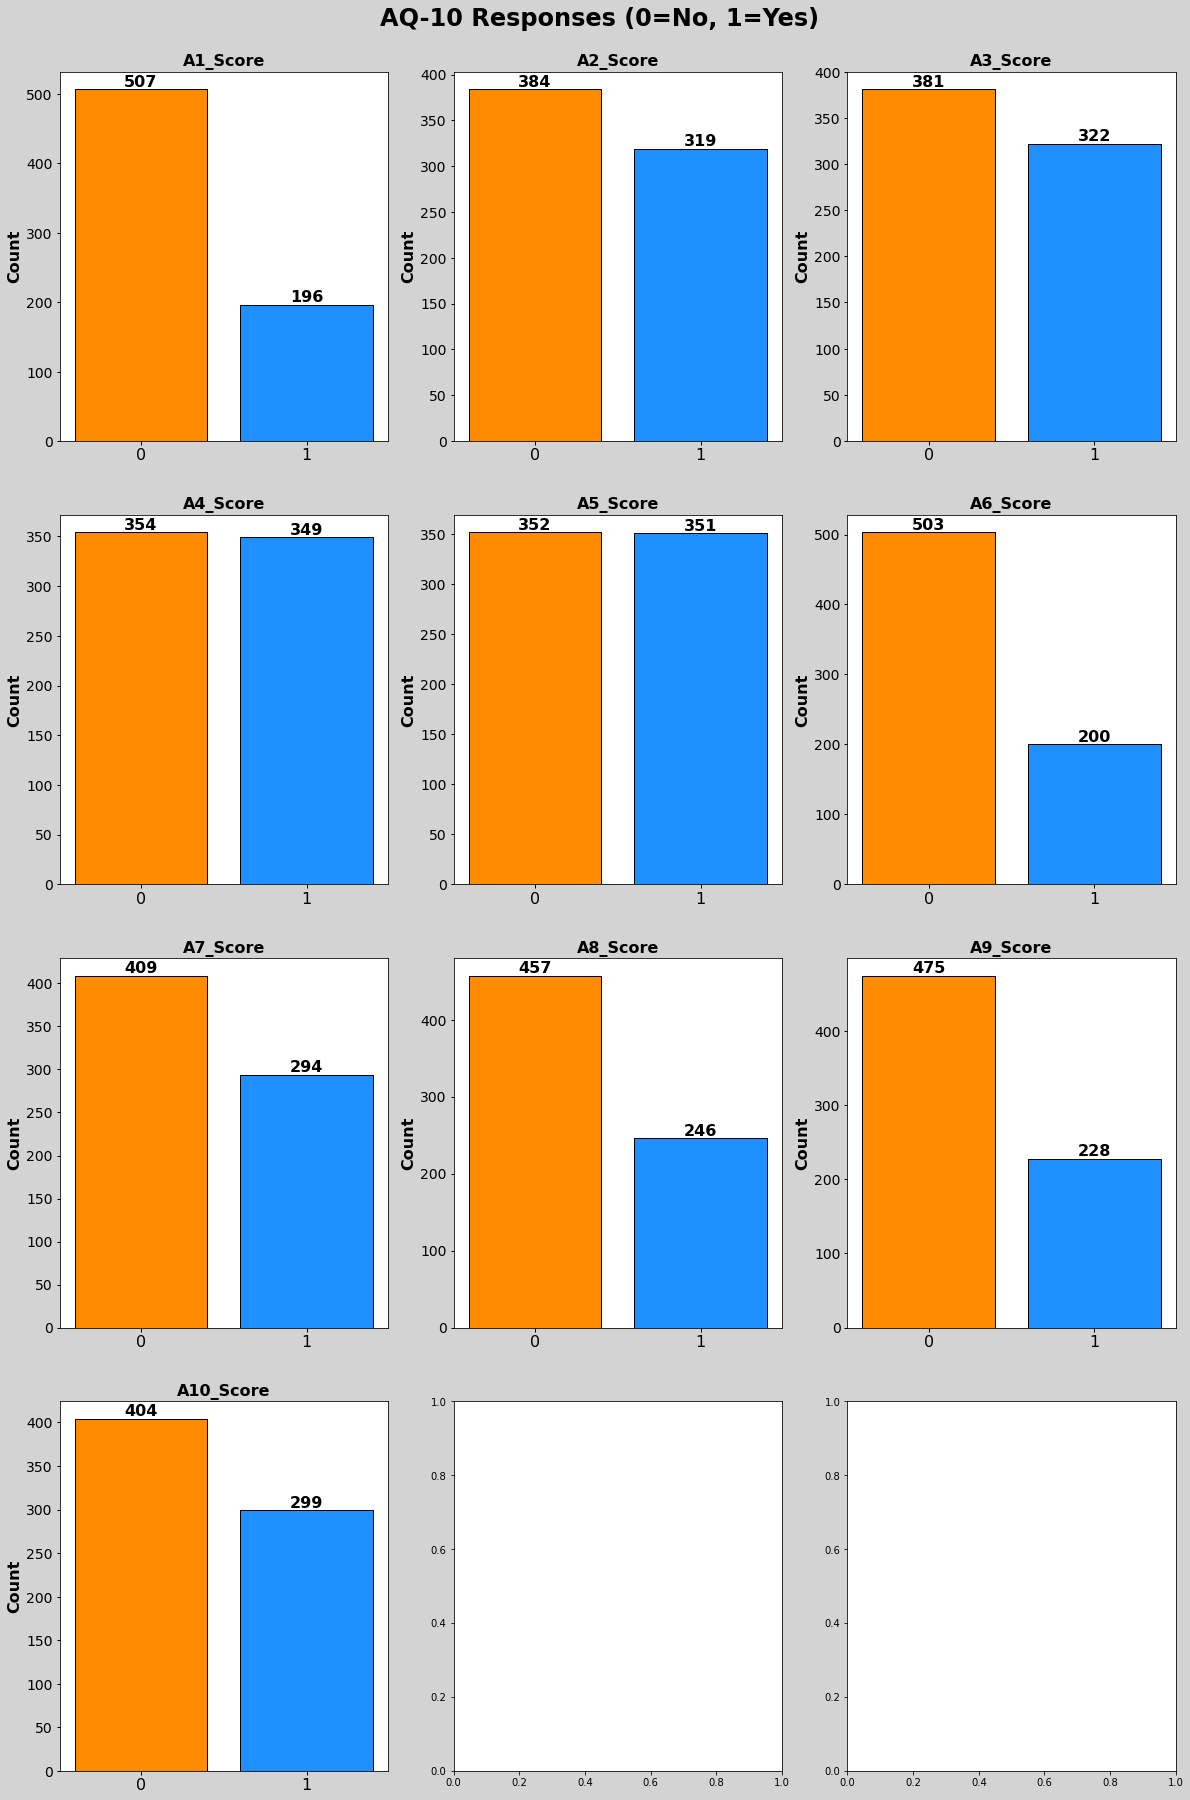

In [392]:
colors = ['darkorange','dodgerblue']

i,j=0,0
PLOTS_PER_ROW = 3
fig, axs = plt.subplots(math.ceil(10/PLOTS_PER_ROW),PLOTS_PER_ROW, figsize=(20, 20))
fig.subplots_adjust(bottom=-.3)
fig.set_facecolor('lightgrey')

for col in range (1,11):
    axs[i][j].bar(sorted(df[f'A{col}_Score'].unique()), df[f'A{col}_Score'].value_counts(), color=colors, edgecolor='black')
    axs[i][j].bar_label(axs[i][j].containers[0], fontsize=16, fontweight='bold', fmt = '%.0f', color='black')
    axs[i][j].set_title(f"A{col}_Score", fontsize=16, fontweight='bold')
    axs[i][j].set_xticks([0,1])
    axs[i][j].tick_params(axis='x', which='major', labelsize=16, width=1)
    axs[i][j].tick_params(axis='y', which='major', labelsize=14, width=1)
    axs[i][j].set_ylabel('Count', fontsize=16, fontweight='bold')
    j+=1
    if j%PLOTS_PER_ROW==0:
        i+=1
        j=0
        
fig.suptitle('AQ-10 Responses (0=No, 1=Yes)', fontsize=24, fontweight='bold', y=.925)
plt.show()

### AQ-10 Responses ASD vs NeuroTypical 

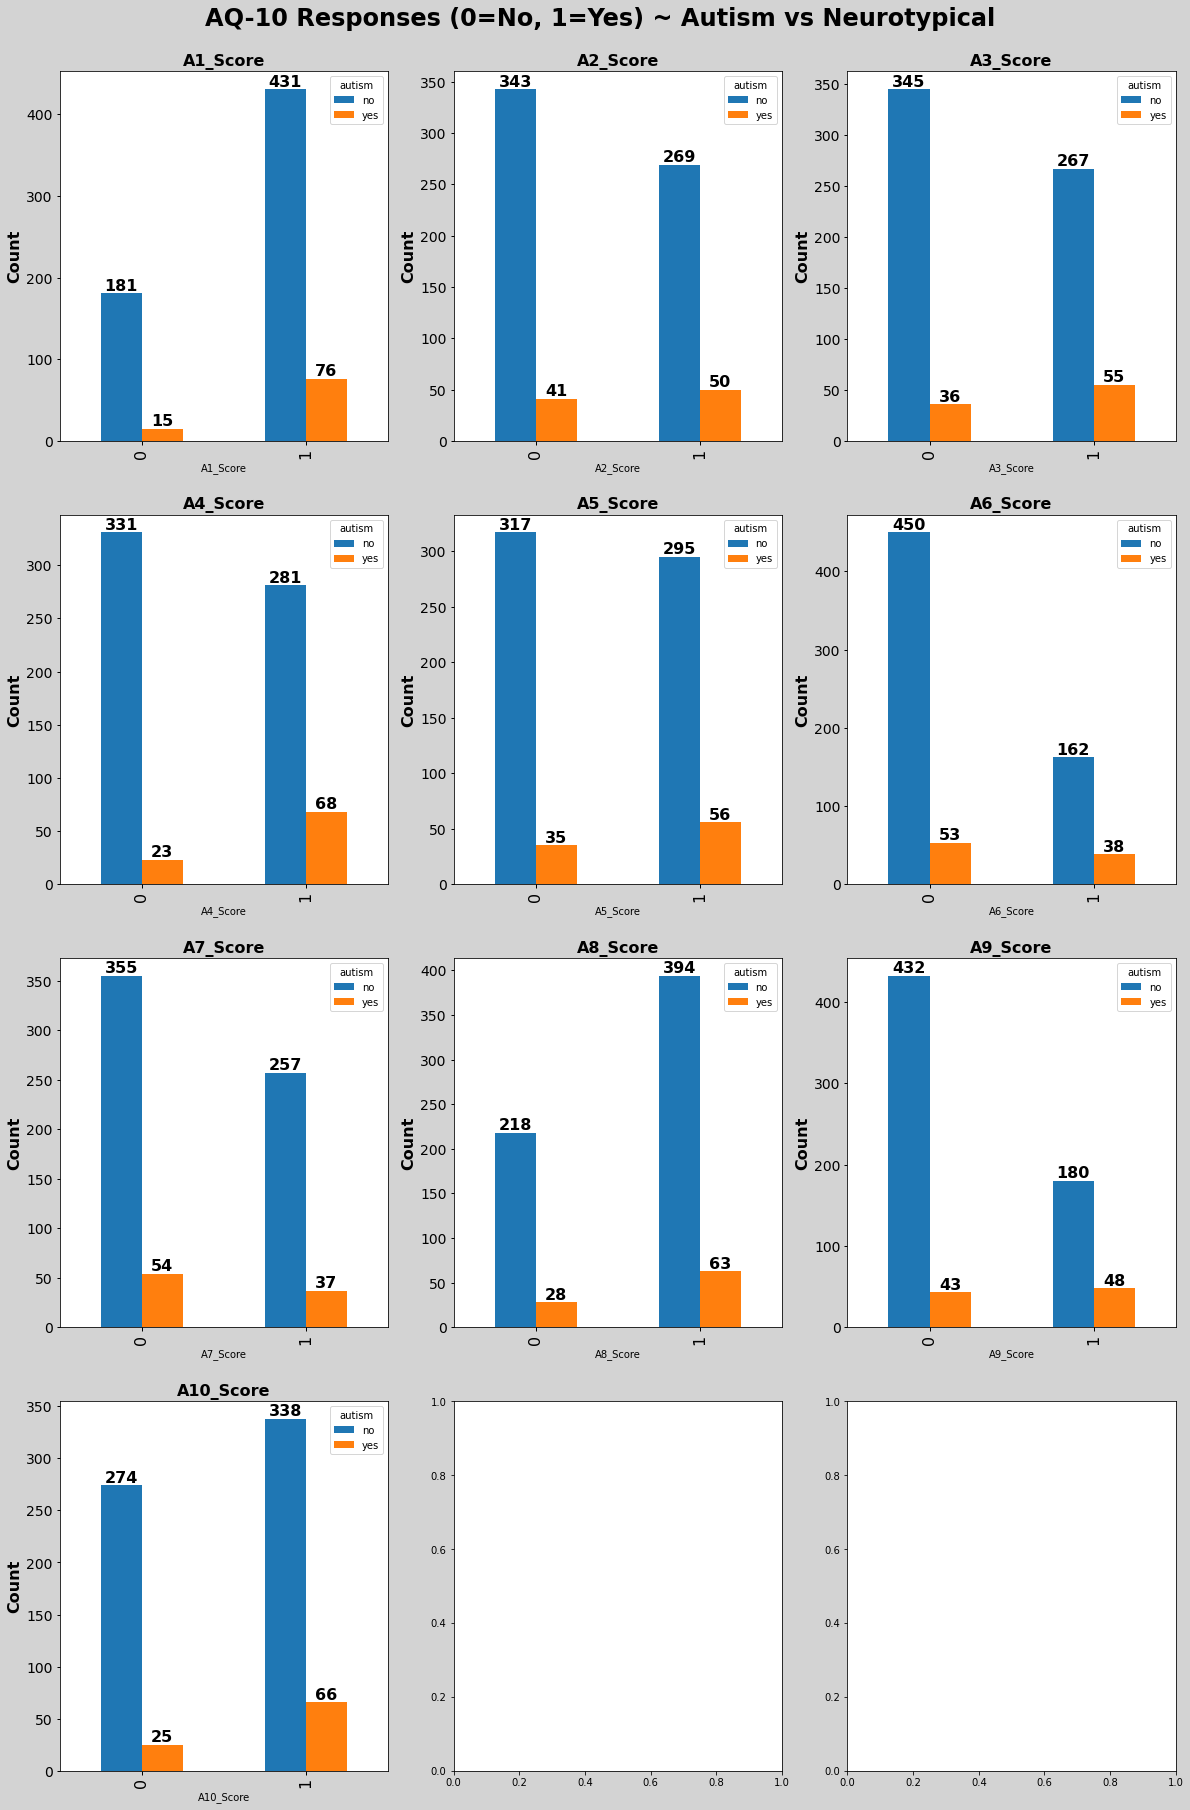

In [393]:
colors = ['darkorange','dodgerblue']

i,j=0,0
PLOTS_PER_ROW = 3
fig, axs = plt.subplots(math.ceil(10/PLOTS_PER_ROW),PLOTS_PER_ROW, figsize=(20, 20))
fig.subplots_adjust(bottom=-.3)
fig.set_facecolor('lightgrey')

for col in range (1,11):
    df.pivot_table(index=f'A{col}_Score', columns=['autism'], aggfunc='size').plot(kind='bar', ax=axs[i][j])
    axs[i][j].bar_label(axs[i][j].containers[0], fontsize=16, fontweight='bold', fmt = '%.0f', color='black')
    axs[i][j].bar_label(axs[i][j].containers[1], fontsize=16, fontweight='bold', fmt = '%.0f', color='black')
    axs[i][j].set_title(f"A{col}_Score", fontsize=16, fontweight='bold')
    axs[i][j].set_xticks([0,1])
    axs[i][j].tick_params(axis='x', which='major', labelsize=16, width=1)
    axs[i][j].tick_params(axis='y', which='major', labelsize=14, width=1)
    axs[i][j].set_ylabel('Count', fontsize=16, fontweight='bold')
    j+=1
    if j%PLOTS_PER_ROW==0:
        i+=1
        j=0
        
fig.suptitle('AQ-10 Responses (0=No, 1=Yes) ~ Autism vs Neurotypical', fontsize=24, fontweight='bold', y=.925)
plt.show()

# ASD Classification Model

### Remove Unwanted Variables

In [394]:
try:
    df.drop(['index','age_desc'], axis = 1, inplace = True)
except KeyError:
    print('index and age_desc already dropped\n')

### Define Model and Variables of Interest

In [395]:
X = df.drop("Class/ASD", axis = 1)
Y = df['Class/ASD']

X = pd.get_dummies(X)
Y = pd.get_dummies(Y)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25)

print(f"Shape of X_train is: {X_train.shape}")
print(f"Shape of Y_train is: {Y_train.shape}\n")
print(f"Shape of X_test is: {X_test.shape}")
print(f"Shape of Y_test is: {Y_test.shape}\n")

input_dim = X.shape[1]

model = Sequential()
model.add(Dense(8, input_dim = input_dim, kernel_initializer='normal', activation='relu'))
model.add(Dense(5, activation = "relu", kernel_initializer='normal'))
model.add(Dense(2, activation = 'sigmoid'))

model.compile(optimizer = Adam(learning_rate = 0.001),
              loss = 'binary_crossentropy',
              metrics = ['accuracy'])

model.summary()

Shape of X_train is: (527, 102)
Shape of Y_train is: (527, 2)

Shape of X_test is: (176, 102)
Shape of Y_test is: (176, 2)

Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_60 (Dense)            (None, 8)                 824       
                                                                 
 dense_61 (Dense)            (None, 5)                 45        
                                                                 
 dense_62 (Dense)            (None, 2)                 12        
                                                                 
Total params: 881
Trainable params: 881
Non-trainable params: 0
_________________________________________________________________


### Model Fitting

In [396]:
print('Model Fitting\n')

result = model.fit(X_train, Y_train, epochs = 100, batch_size = 10)

Model Fitting

Epoch 1/100
53/53 [==============================] - 0s 462us/step - loss: 0.6609 - accuracy: 0.7192
Epoch 2/100
53/53 [==============================] - 0s 465us/step - loss: 0.6060 - accuracy: 0.7192
Epoch 3/100
53/53 [==============================] - 0s 470us/step - loss: 0.5482 - accuracy: 0.7192
Epoch 4/100
53/53 [==============================] - 0s 462us/step - loss: 0.4852 - accuracy: 0.7419
Epoch 5/100
53/53 [==============================] - 0s 462us/step - loss: 0.4116 - accuracy: 0.8596
Epoch 6/100
53/53 [==============================] - 0s 462us/step - loss: 0.3501 - accuracy: 0.8824
Epoch 7/100
53/53 [==============================] - 0s 481us/step - loss: 0.2840 - accuracy: 0.9165
Epoch 8/100
53/53 [==============================] - 0s 462us/step - loss: 0.2396 - accuracy: 0.9241
Epoch 9/100
53/53 [==============================] - 0s 462us/step - loss: 0.2066 - accuracy: 0.9374
Epoch 10/100
53/53 [==============================] - 0s 454us/step - loss: 

53/53 [==============================] - 0s 462us/step - loss: 0.0056 - accuracy: 1.0000
Epoch 82/100
53/53 [==============================] - 0s 481us/step - loss: 0.0053 - accuracy: 1.0000
Epoch 83/100
53/53 [==============================] - 0s 462us/step - loss: 0.0047 - accuracy: 1.0000
Epoch 84/100
53/53 [==============================] - 0s 462us/step - loss: 0.0048 - accuracy: 1.0000
Epoch 85/100
53/53 [==============================] - 0s 462us/step - loss: 0.0085 - accuracy: 1.0000
Epoch 86/100
53/53 [==============================] - 0s 462us/step - loss: 0.0042 - accuracy: 1.0000
Epoch 87/100
53/53 [==============================] - 0s 462us/step - loss: 0.0056 - accuracy: 1.0000
Epoch 88/100
53/53 [==============================] - 0s 476us/step - loss: 0.0037 - accuracy: 1.0000
Epoch 89/100
53/53 [==============================] - 0s 518us/step - loss: 0.0037 - accuracy: 1.0000
Epoch 90/100
53/53 [==============================] - 0s 462us/step - loss: 0.0035 - accuracy: 

### Visualizing Model Accuracy and Loss

In [397]:
acc = result.history['accuracy']
loss = result.history['loss']

epoch = [i + 1 for i in range(len(acc))]

In [398]:
acc_loss_df = pd.DataFrame({"Accuracy" : acc,
                            "Loss" : loss,
                            "Epoch" : epoch})

acc_loss_df.style.bar(color = 'thistle',
                      subset = ['Accuracy','Loss'])

,Accuracy,Loss,Epoch
0,0.719165,0.660887,1
1,0.719165,0.606016,2
2,0.719165,0.548232,3
3,0.741935,0.485204,4
4,0.859583,0.411599,5
5,0.882353,0.350136,6
6,0.916509,0.283997,7
7,0.924099,0.239623,8
8,0.937381,0.206553,9
9,0.944972,0.181500,10


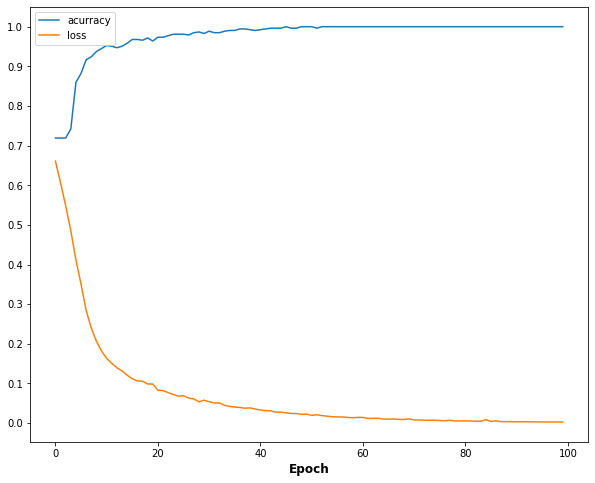

In [399]:
plt.figure(figsize=(10,8))
plt.plot(acc, label='acurracy')
plt.plot(loss, label='loss')
plt.yticks([i/10 for i in range(0,11)])
ax.set_xlim([0, 50])
ax.set_ylim([0, 1])
plt.xlabel('Epoch', fontsize=12, fontweight='bold')
plt.legend()
plt.show()

### Evaluate Model

In [400]:
loss, acc = model.evaluate(X_test, Y_test)
print()
print(f"Accuracy on unseen data is: { np.round(acc, 2) }\n")
print(f'Loss on unseen data is: { np.round(loss, 2) }')

6/6 [==============================] - 0s 600us/step - loss: 0.0345 - accuracy: 0.9830

Accuracy on unseen data is: 0.98

Loss on unseen data is: 0.03


### Classification Report

In [401]:
prediction = model.predict(X_test)
prediction = np.argmax(prediction, axis = 1)

print('\nAccuracy Score: ',end='')
print(accuracy_score(Y_test[['YES']], prediction))

6/6 [==============================] - 0s 403us/step

Accuracy Score: 0.9829545454545454


In [402]:
print(classification_report(Y_test[['YES']], prediction))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       135
           1       0.95      0.98      0.96        41

    accuracy                           0.98       176
   macro avg       0.97      0.98      0.98       176
weighted avg       0.98      0.98      0.98       176

